<a href="https://colab.research.google.com/github/yharshityadav/IPL-Machine-Learning-Model/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('IPL.csv')
df

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
70,71,"May 21,2024",Hyderabad,Kolkata,Hyderabad,Bat,159,10,164,2,Kolkata,Mitchell Starc,Shreyas Iyer,Mitchell Starc
71,72,"May 22,2024",Banglore,Rajasthan,Rajasthan,Field,172,8,174,6,Rajasthan,Ravichandran Ashwin,Yashasvi Jaiswal,Avesh Khan
72,73,"May 24,2024",Hyderabad,Rajasthan,Rajasthan,Field,175,9,139,7,Hyderabad,Shahbaz Ahmed,Dhruv Jurel,Shahbaz Ahmed


In [30]:
df.drop(columns=['id','date','toss_winner','decision','most_runs','most_wkts'],axis=1,inplace=True)

In [31]:
drop_duplicate = df[df.duplicated()]
drop_duplicate

,team1,team2,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match


In [32]:
df.dropna()

,team1,team2,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match
0,Banglore,Chennai,173,6,176,4,Chennai,Mustafizur Rahman
1,Delhi,Punjab,174,9,177,6,Punjab,Sam Curran
2,Kolkata,Hyderabad,208,7,204,7,Kolkata,Andre Russell
3,Rajasthan,Lucknow,193,4,173,6,Rajasthan,Sanju Samson
4,Gujarat,Mumbai,168,6,162,9,Gujarat,Sai Sudharsan
...,...,...,...,...,...,...,...,...
68,Punjab,Hyderabad,214,5,215,6,Hyderabad,Abhishek Sharma
70,Hyderabad,Kolkata,159,10,164,2,Kolkata,Mitchell Starc
71,Banglore,Rajasthan,172,8,174,6,Rajasthan,Ravichandran Ashwin
72,Hyderabad,Rajasthan,175,9,139,7,Hyderabad,Shahbaz Ahmed


In [33]:
df.drop(columns=['player_of_the_match'],axis=1,inplace=True)

In [34]:
df

,team1,team2,first_score,first_wkts,second_score,second_wkts,winner
0,Banglore,Chennai,173,6,176,4,Chennai
1,Delhi,Punjab,174,9,177,6,Punjab
2,Kolkata,Hyderabad,208,7,204,7,Kolkata
3,Rajasthan,Lucknow,193,4,173,6,Rajasthan
4,Gujarat,Mumbai,168,6,162,9,Gujarat
...,...,...,...,...,...,...,...
69,Rajasthan,Kolkata,0,0,0,0,Abandoned
70,Hyderabad,Kolkata,159,10,164,2,Kolkata
71,Banglore,Rajasthan,172,8,174,6,Rajasthan
72,Hyderabad,Rajasthan,175,9,139,7,Hyderabad


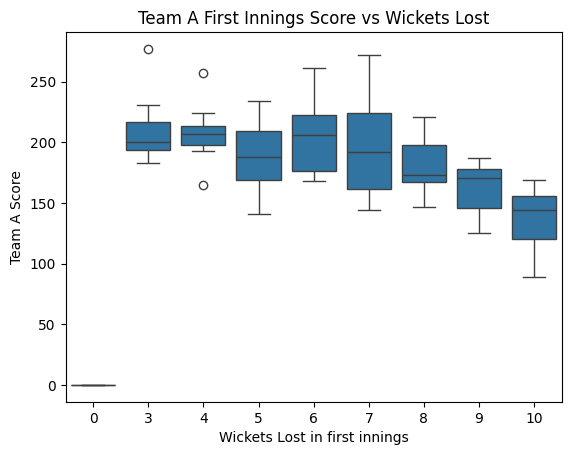

In [46]:
sns.boxplot(y='first_score', x='first_wkts', data=df)
plt.title('Team A First Innings Score vs Wickets Lost')
plt.xlabel('Wickets Lost in first innings')
plt.ylabel('Team A Score')
plt.show()


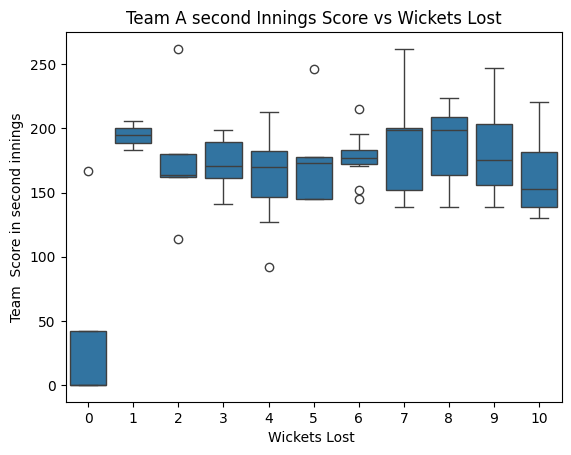

In [45]:
sns.boxplot(y='second_score', x='second_wkts', data=df)
plt.title('Team A second Innings Score vs Wickets Lost')
plt.xlabel('Wickets Lost ')
plt.ylabel('Team  Score in second innings')
plt.show()

In [47]:
q1 = df['first_score'].quantile(0.25)
q3 = df['first_score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['first_score'] < lower_bound) | (df['first_score'] > upper_bound)]
print("Outliers in first innings score:")
print(outliers[['team1', 'team2', 'first_score']])

Outliers in first innings score:
        team1    team2  first_score
7   Hyderabad   Mumbai          277
31    Gujarat    Delhi           89
62    Gujarat  Kolkata            0
65  Hyderabad  Gujarat            0
69  Rajasthan  Kolkata            0


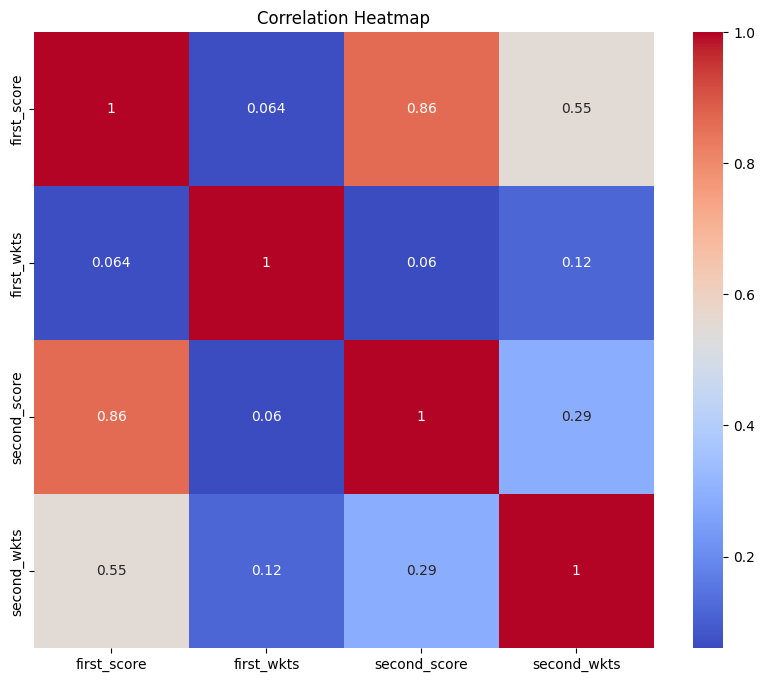

In [51]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

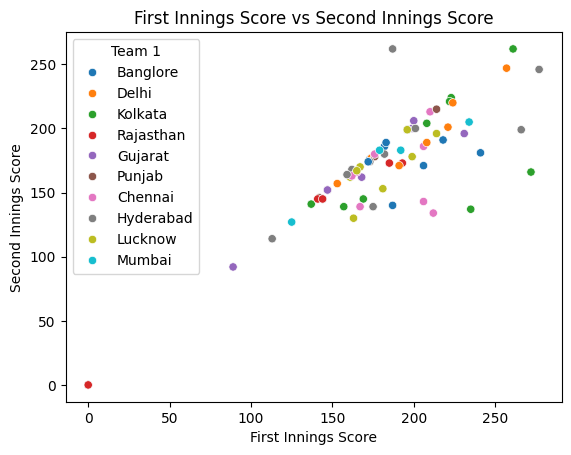

In [58]:
sns.scatterplot(x='first_score', y='second_score', data=df, hue='team1')
plt.title('First Innings Score vs Second Innings Score')
plt.xlabel('First Innings Score')
plt.ylabel('Second Innings Score')
plt.legend(title='Team 1')
plt.show()


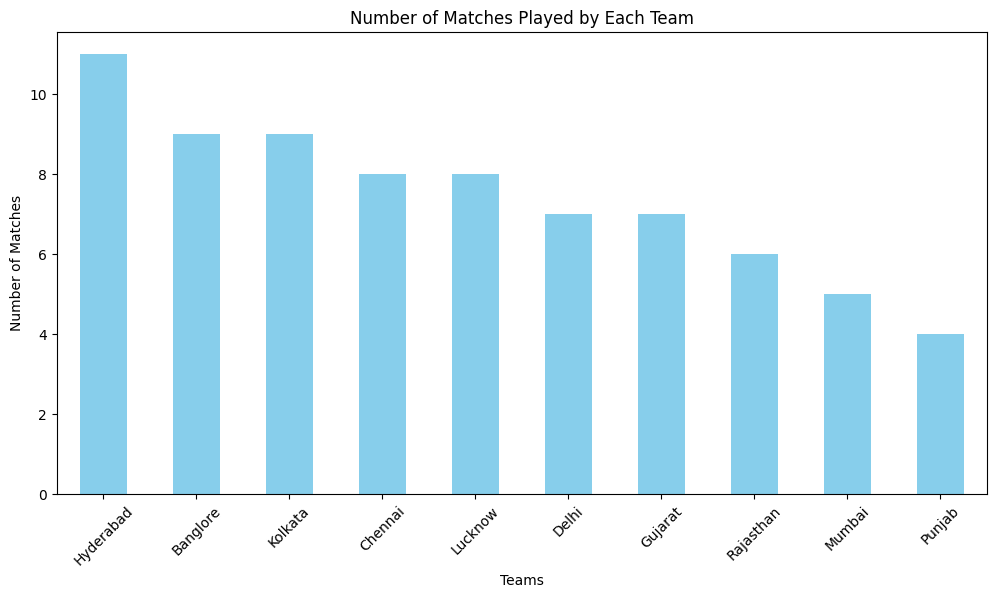

In [59]:
barplot = df['team1'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()